# Imports

In [46]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline

# Load the data
# 1 Benin

In [91]:
filepath=r"C:\ML and DS Files\Kifiya AI\week 0 data\benin-malanville.csv"
data = pd.read_csv(filepath)
data.head()

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

# Data check and cleaning

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [74]:
# List columns containing NaN values
columns_with_nan = data.columns[data.isnull().any()].tolist()
print(f'the column  {columns_with_nan}  has null value')

the column  ['Comments']  has null value


In [93]:
# Check for missing values
missing_summary = data.isnull().sum()
print("Missing Values Summary:")
print(missing_summary)

Missing Values Summary:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [100]:
#drop commnets column 
data.drop(columns=['Comments'], inplace = True)
data.head()

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2  
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2  
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2  
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3  
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3

In [101]:
# Check for negative values
negative_values = data[(data['GHI'] < 0) | (data['DNI'] < 0) | (data['DHI'] < 0) |
                       (data['ModA'] < 0) | (data['ModB'] < 0) | 
                       (data['WS'] < 0) | (data['WSgust'] < 0)]
print("Rows with Negative Values:")
print(negative_values)


Rows with Negative Values:
               Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0       2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1       2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2       2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3       2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4       2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   
...                  ...  ...  ...  ...   ...   ...   ...   ...  ...     ...   
525595  2022-08-08 23:56 -5.5 -0.1 -5.9   0.0   0.0  23.1  98.3  0.3     1.1   
525596  2022-08-08 23:57 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.2     0.7   
525597  2022-08-08 23:58 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.4  0.6     1.1   
525598  2022-08-08 23:59 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.9     1.3   
525599  2022-08-09 00:00 -5.5 -0.1 -5.7   0.0   0.0  23.1  98.3  1.2     1.6   

        WSst

# outliers in 'ModA', 'ModB', 'WS', 'WSgust'
Any value smaller than the lower boundary or larger than the upper boundary is an outlier. Calculate the Q1 (25th percentile) and Q3 (75th percentile) of the data

In [102]:
# ['ModA', 'ModB', 'WS', 'WSgust']
def detect_outliers_iqr(df, columns):
    outlier_info = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_info[col] = {
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'outliers_count': len(outliers),
            'outliers': outliers
        }
    return outlier_info

# Columns to check
columns_to_check = ['ModA', 'ModB', 'WS', 'WSgust']

# Detect outliers
outliers_info = detect_outliers_iqr(data, columns_to_check)

# Display outlier details
for col, info in outliers_info.items():
    print(f"Column: {col}")
    print(f"Lower Bound: {info['lower_bound']}, Upper Bound: {info['upper_bound']}")
    print(f"Number of Outliers: {info['outliers_count']}")
    print(f"Outliers:\n{info['outliers']}\n")


Column: ModA
Lower Bound: -694.8, Upper Bound: 1158.0
Number of Outliers: 3
Outliers:
               Timestamp     GHI    DNI    DHI    ModA  ModB  Tamb    RH   WS  \
8018    2021-08-14 13:39  1233.0  877.0  356.6  1159.0   4.3  30.4  70.2  3.0   
43973   2021-09-08 12:54  1188.0  548.8  618.5  1158.3   4.3  32.5  56.5  1.7   
360748  2022-04-16 12:29  1200.0  600.6  574.1  1158.9   4.3  33.2  52.0  0.5   

        WSgust  WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  \
8018       4.9      0.9  238.8     14.6  995         0            0.0   60.0   
43973      2.6      0.7   82.3      3.5  996         0            0.0   71.6   
360748     1.6      0.6  126.1     27.4  993         0            0.0   70.6   

        TModB  
8018     55.5  
43973    59.1  
360748   54.6  

Column: ModB
Lower Bound: -670.2, Upper Bound: 1117.0
Number of Outliers: 12
Outliers:
               Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH  \
868     2021-08-09 14:29  1216.0  791.

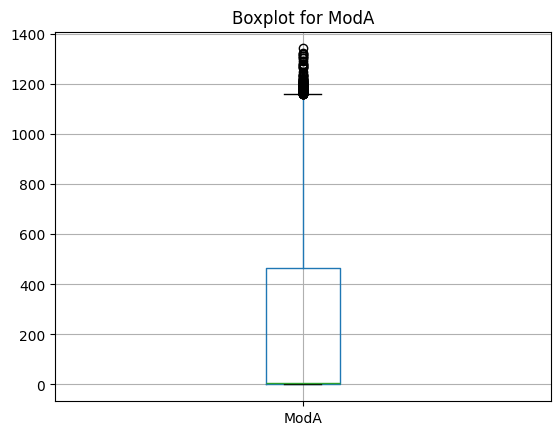

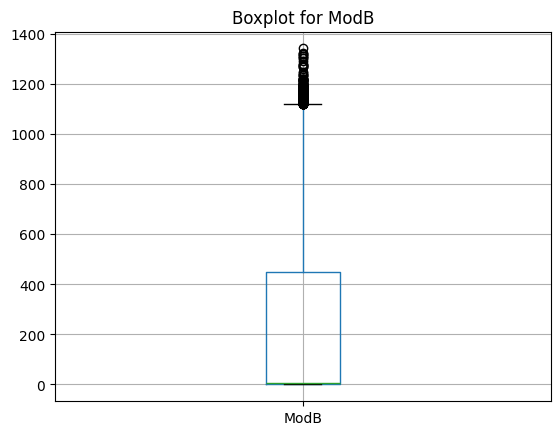

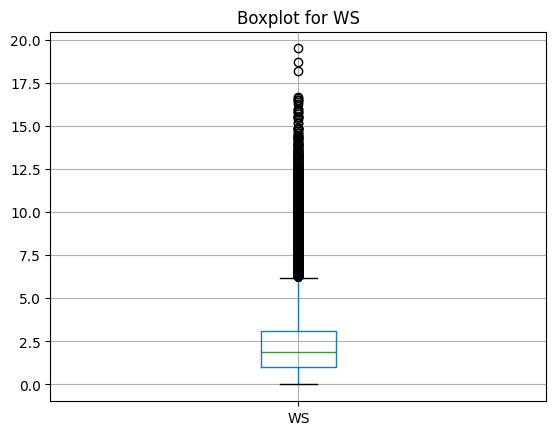

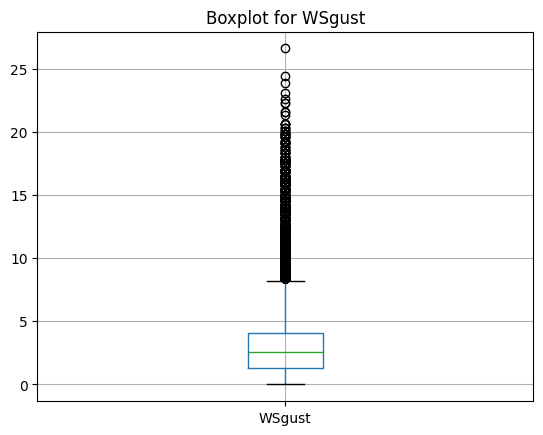

In [78]:
# visualize outliers in Boxplots
for col in columns_to_check:
    plt.figure()
    data.boxplot(column=col)
    plt.title(f"Boxplot for {col}")
    plt.show()


Replace outliers with the median of the column:

In [103]:
# the assignment data[col] = ... directly overwrites the column in the DataFrame.
for col in columns_to_check:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = data[col].median()
    data[col] = data[col].apply(lambda x: median if (x < lower_bound or x > upper_bound) else x)

data.head()

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2  
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2  
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2  
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3  
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3

# Time Series Analysis

In [80]:
# Ensure the 'timestamp' column is in datetime format
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Add time-based features

data['month'] = data['Timestamp'].dt.month
data['hour'] = data['Timestamp'].dt.hour

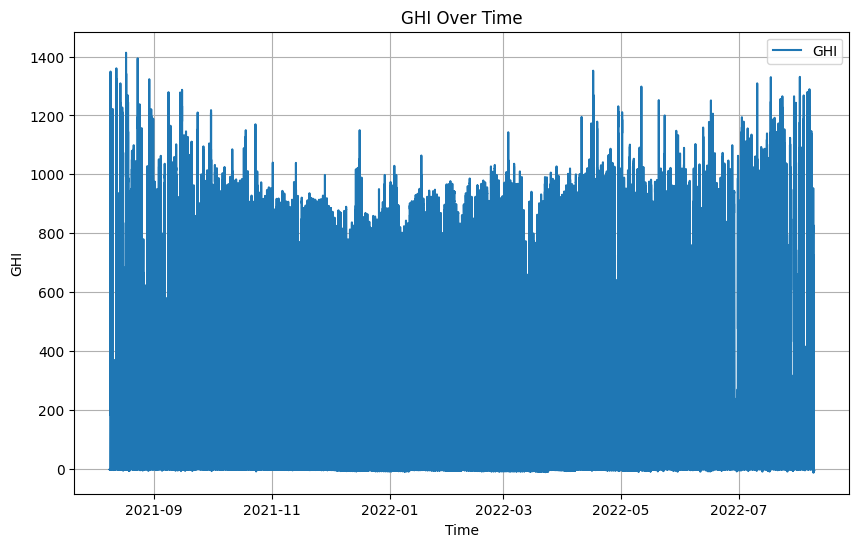

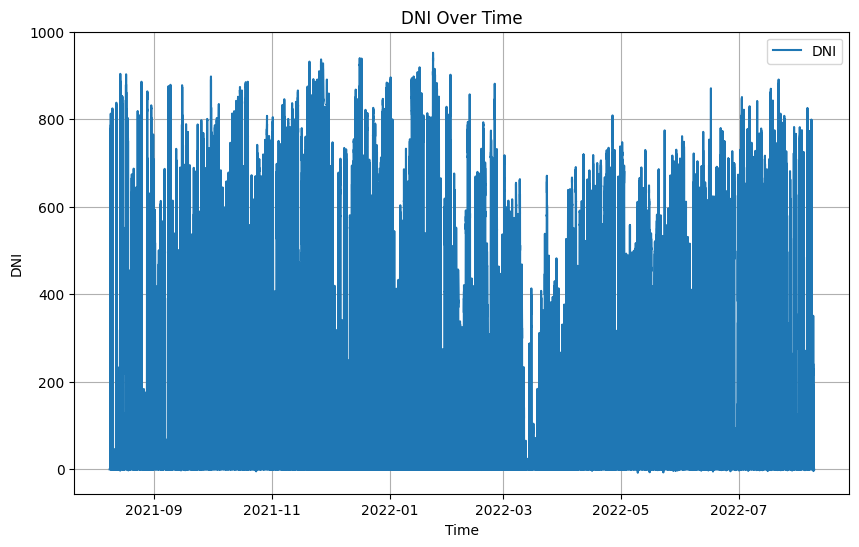

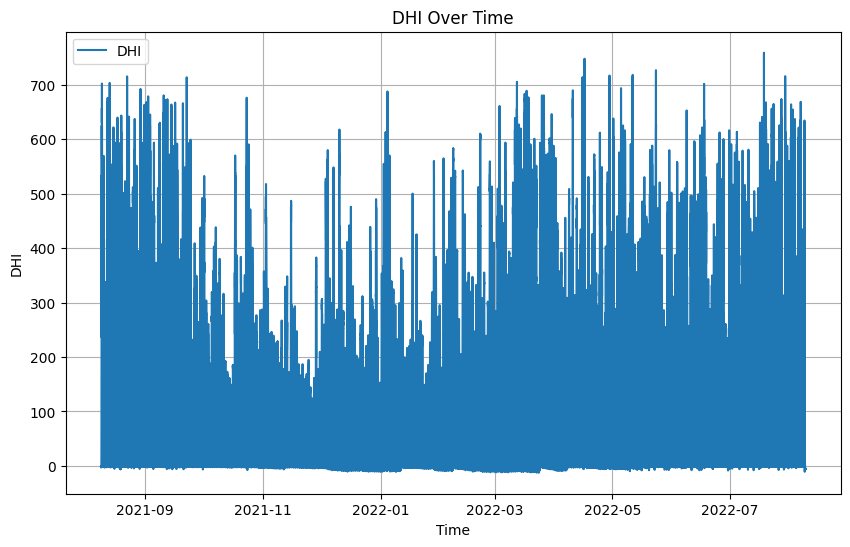

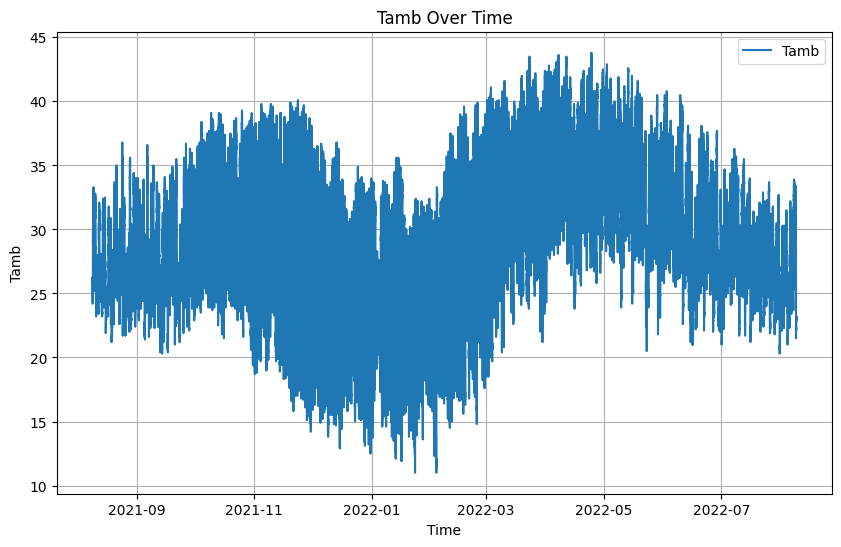

In [81]:
# Set the timestamp as the index for easier plotting
data.set_index('Timestamp', inplace=True)

# Plot line charts for GHI, DNI, DHI, and Tamb
columns_to_plot = ['GHI', 'DNI', 'DHI', 'Tamb']
for col in columns_to_plot:
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data[col], label=col)
    plt.title(f"{col} Over Time")
    plt.xlabel("Time")
    plt.ylabel(col)
    plt.legend()
    plt.grid()
    plt.show()


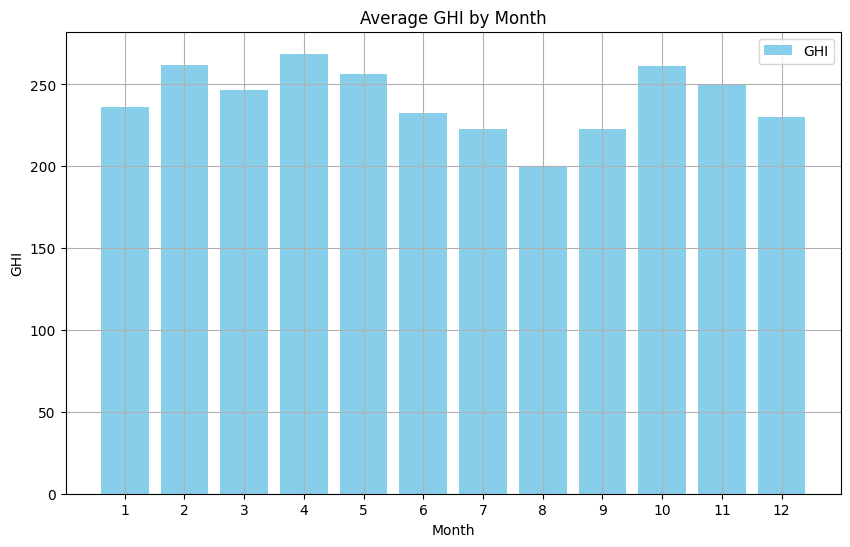

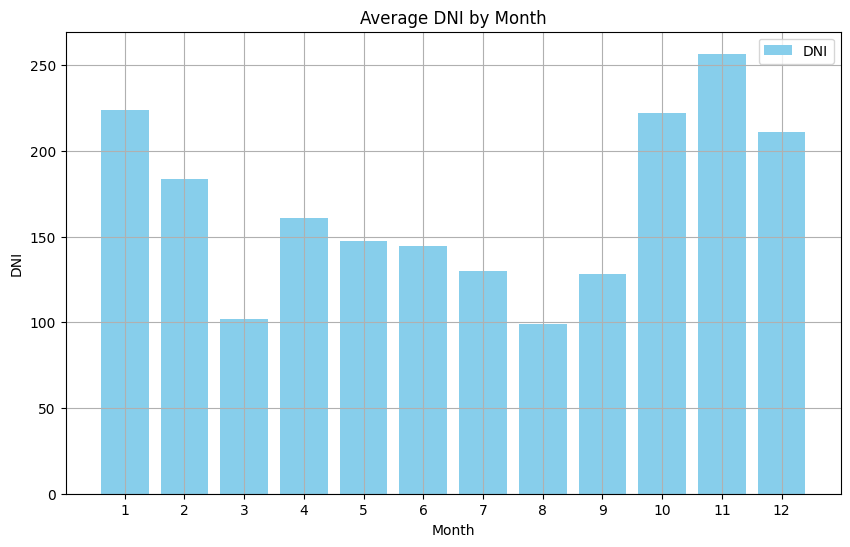

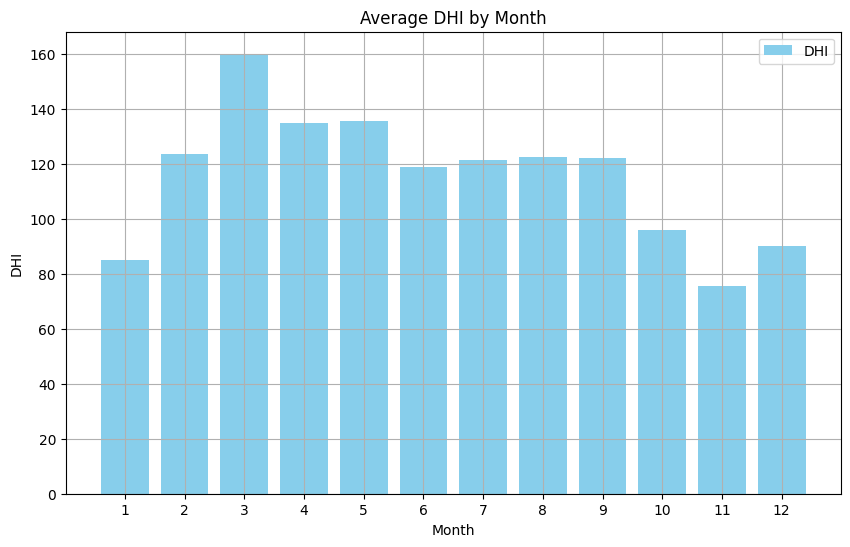

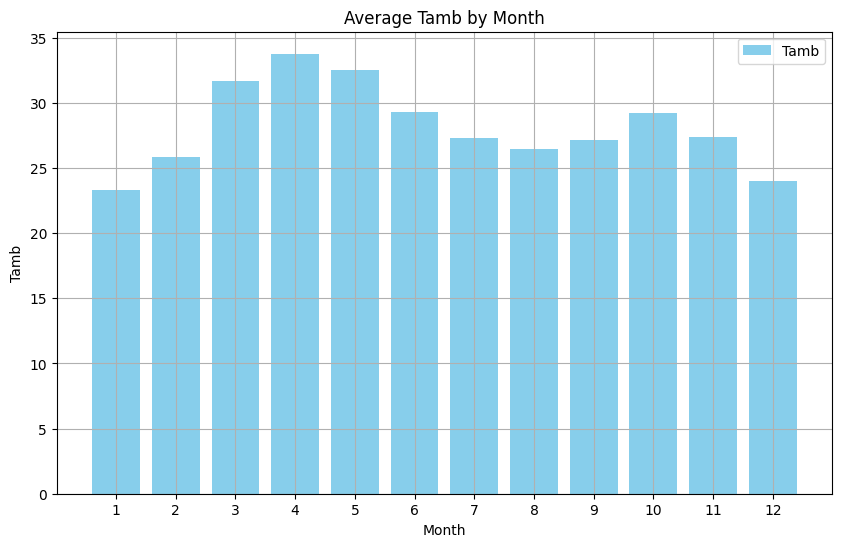

In [82]:
# Monthly averages
monthly_data = data.groupby('month')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

# Plot bar charts
for col in columns_to_plot:
    plt.figure(figsize=(10, 6))
    plt.bar(monthly_data.index, monthly_data[col], color='skyblue', label=col)
    plt.title(f"Average {col} by Month")
    plt.xlabel("Month")
    plt.ylabel(col)
    plt.xticks(monthly_data.index)  
    plt.legend()
    plt.grid()
    plt.show()


#  Correlation Analysis

In [83]:
columns_of_interest = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'WS', 'WSgust', 'WD']
data_c = data[columns_of_interest]

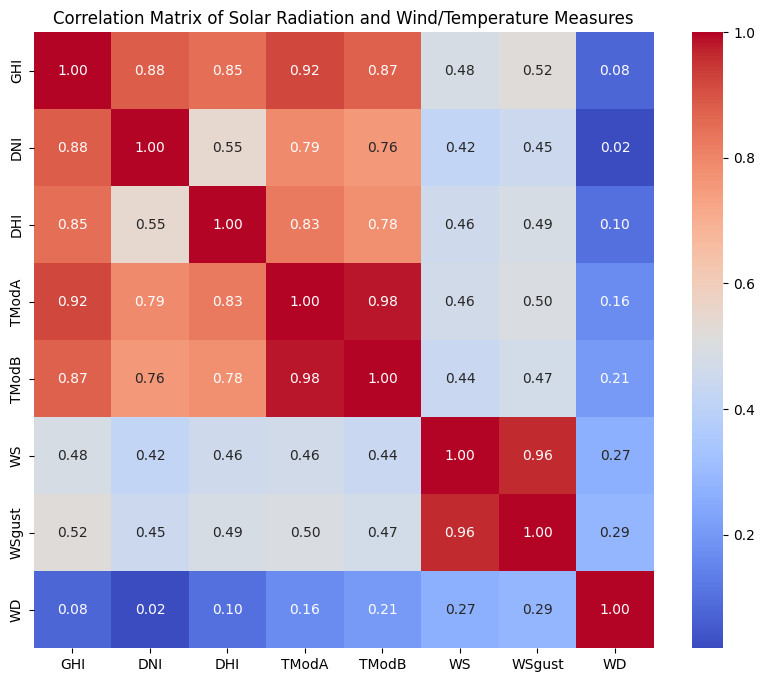

In [84]:
# Compute correlation matrix
corr_matrix = data_c.corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Matrix of Solar Radiation and Wind/Temperature Measures")
plt.show()


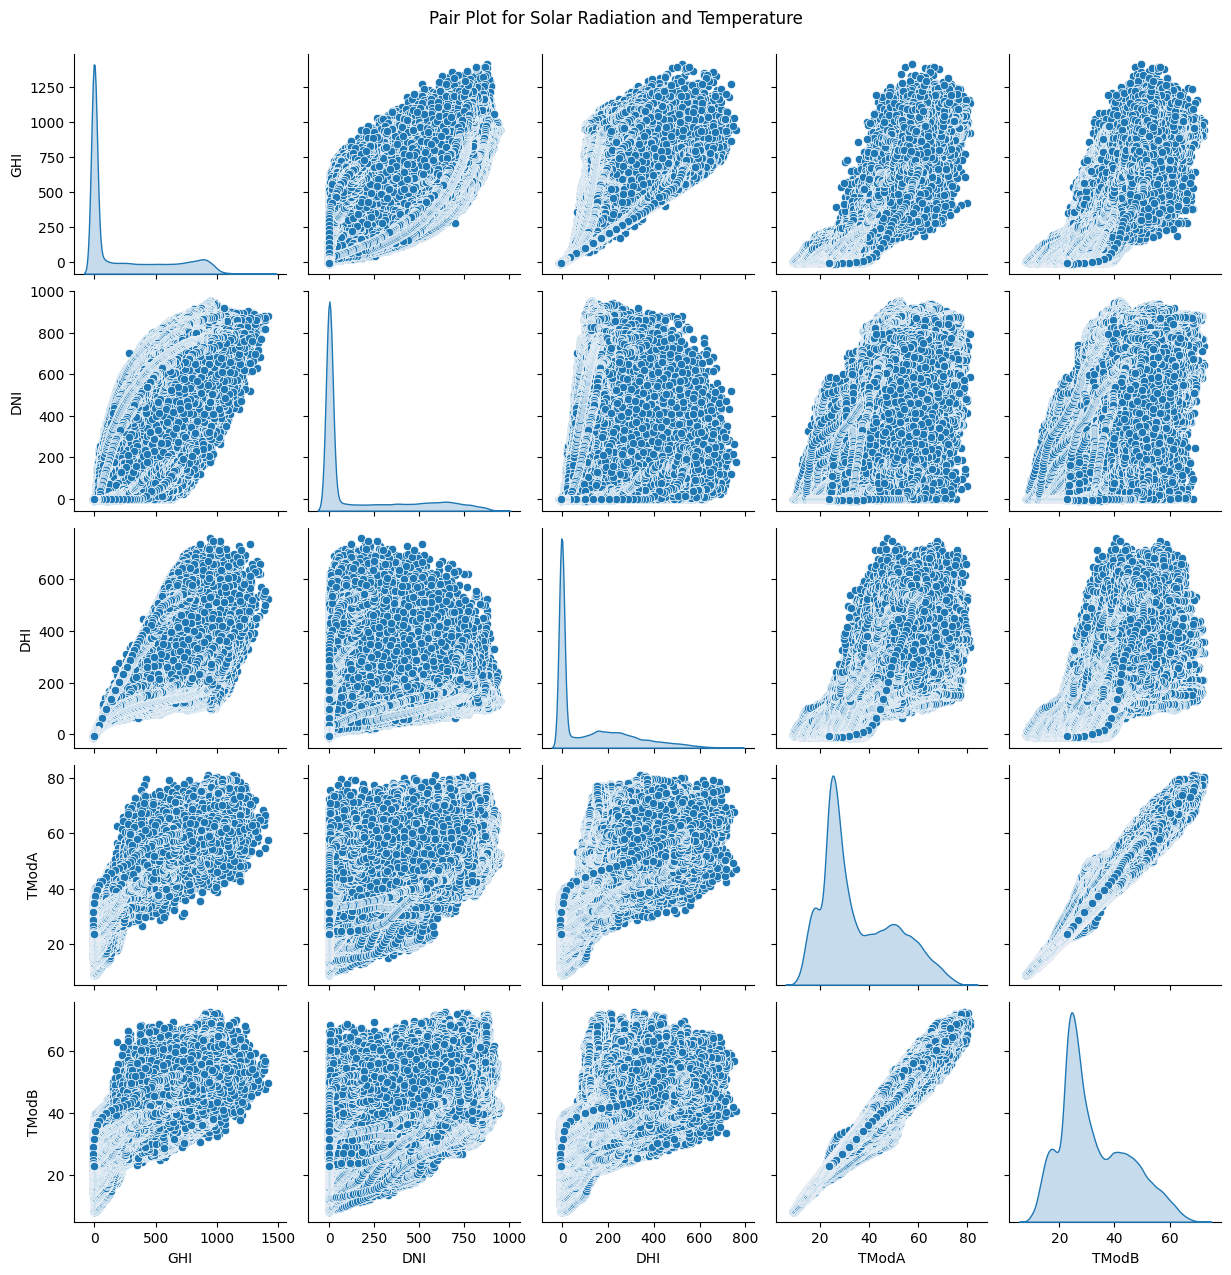

In [85]:
# Pair plot for solar radiation and temperature measures
sns.pairplot(data_c[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']], diag_kind='kde')
plt.suptitle("Pair Plot for Solar Radiation and Temperature", y=1.02)
plt.show()


In [ ]:
# Investigate Relationships Between Specific Variables

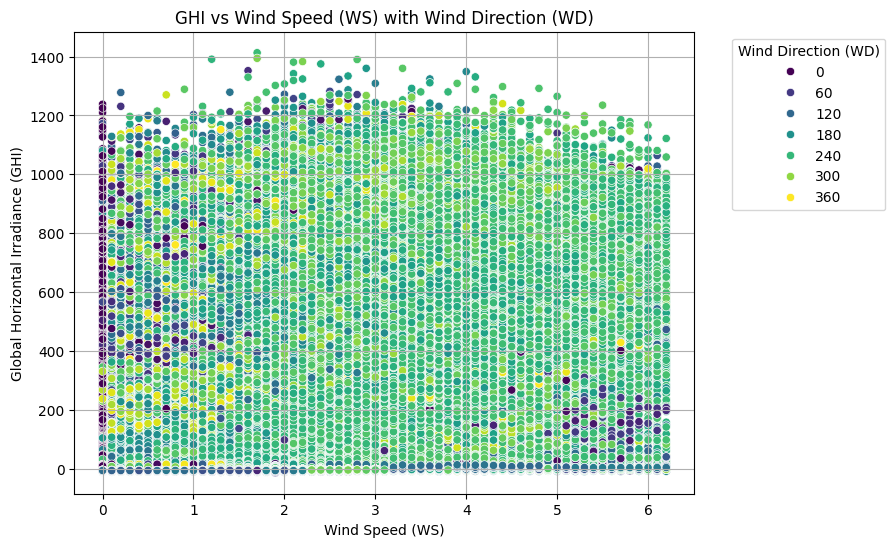

In [86]:
# GHI vs WS
plt.figure(figsize=(8, 6))
sns.scatterplot(x='WS', y='GHI', data=data_c, hue='WD', palette='viridis')
plt.title("GHI vs Wind Speed (WS) with Wind Direction (WD)")
plt.xlabel("Wind Speed (WS)")
plt.ylabel("Global Horizontal Irradiance (GHI)")
plt.legend(title='Wind Direction (WD)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()


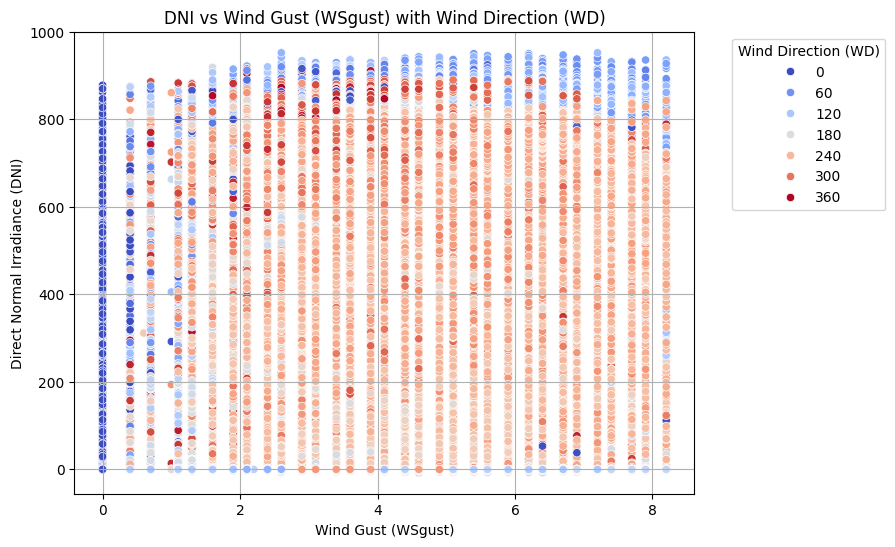

In [87]:
# DNI vs WSgust
plt.figure(figsize=(8, 6))
sns.scatterplot(x='WSgust', y='DNI', data=data_c, hue='WD', palette='coolwarm')
plt.title("DNI vs Wind Gust (WSgust) with Wind Direction (WD)")
plt.xlabel("Wind Gust (WSgust)")
plt.ylabel("Direct Normal Irradiance (DNI)")
plt.legend(title='Wind Direction (WD)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()


# Wind Analysis

In [105]:
# Filter data for wind speed and direction, drop missing values
data_w = data[['WS', 'WD']].dropna()

# Normalize wind direction (degrees are typically between 0 and 360)
wind_speed = data_w['WS'].values
wind_direction = data_w['WD'].values

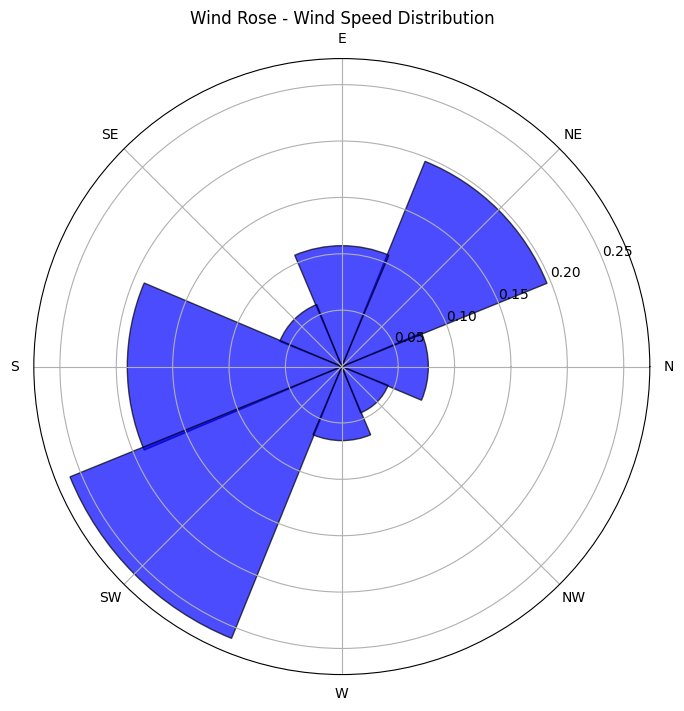

In [106]:
# Bin wind directions into 8 sectors
bins = np.arange(0, 360 + 45, 45)  # 8 bins, 45° each
wind_dir_bin = np.digitize(wind_direction, bins, right=False)

# Aggregate wind speed within each wind direction bin
wind_speed_sum = np.zeros(len(bins) - 1)
for i in range(1, len(bins)):
    wind_speed_sum[i - 1] = wind_speed[wind_dir_bin == i].sum()

# Normalize wind speed for plotting purposes
wind_speed_sum /= wind_speed_sum.sum()  # Normalize to proportions
angles = np.linspace(0, 2 * np.pi, len(wind_speed_sum), endpoint=False)

# Plotting the wind rose
plt.figure(figsize=(10, 8))
ax = plt.subplot(111, polar=True)

# Plot radial bars for wind speeds
bars = ax.bar(angles, wind_speed_sum, align='center', color='b', alpha=0.7)

# Use wind rose radial ticks
for bar in bars:
    bar.set_edgecolor("black")  # Add edges to distinguish sections

# Set labels for cardinal directions
ax.set_xticks(np.linspace(0, 2 * np.pi, len(bins) - 1, endpoint=False))
ax.set_xticklabels(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'])

# Display wind speed proportions
plt.title('Wind Rose - Wind Speed Distribution')
plt.show()


# Temperature Analysis

In [107]:
# Columns of interest
columns_of_interest = ['RH', 'TModA', 'TModB', 'GHI', 'DNI', 'DHI']

# Drop rows with missing values in these columns
data_t = data[columns_of_interest].dropna()

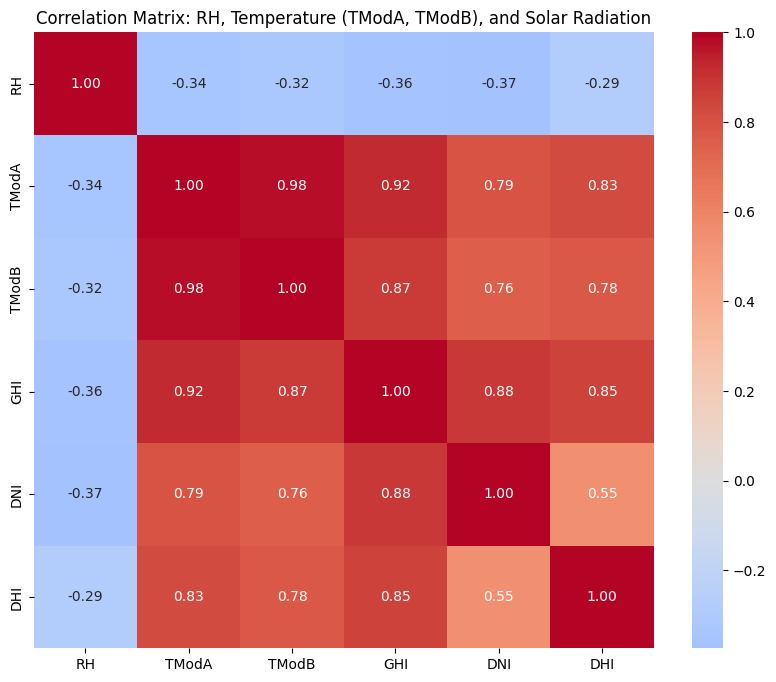

In [108]:
# Compute the correlation matrix
correlation_matrix = data_t.corr()

# Display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title("Correlation Matrix: RH, Temperature (TModA, TModB), and Solar Radiation")
plt.show()


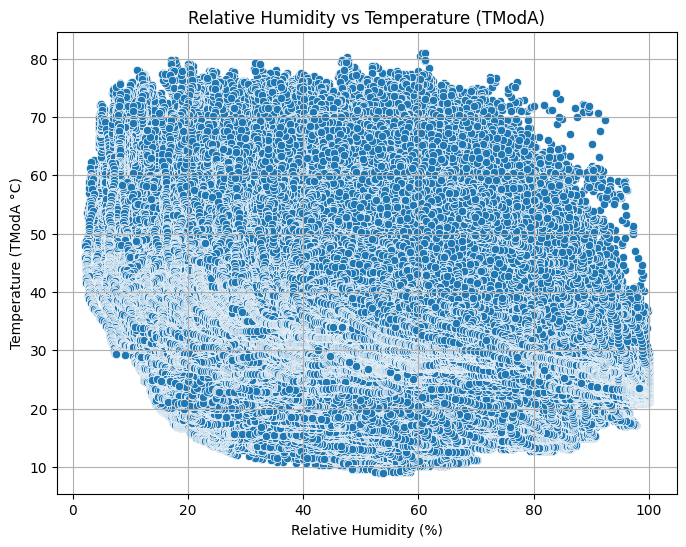

In [109]:
# RH vs TModA
plt.figure(figsize=(8, 6))
sns.scatterplot(x='RH', y='TModA', data=data_t)
plt.title("Relative Humidity vs Temperature (TModA)")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("Temperature (TModA °C)")
plt.grid()
plt.show()


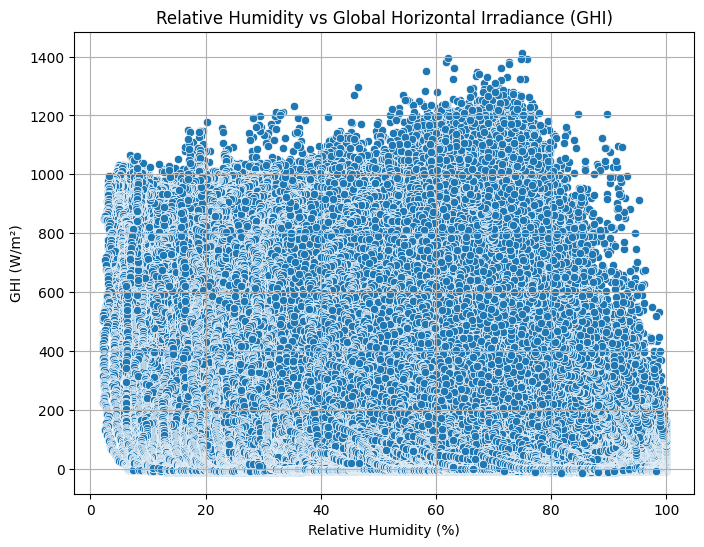

In [110]:
# RH vs GHI
plt.figure(figsize=(8, 6))
sns.scatterplot(x='RH', y='GHI', data=data_t)
plt.title("Relative Humidity vs Global Horizontal Irradiance (GHI)")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("GHI (W/m²)")
plt.grid()
plt.show()


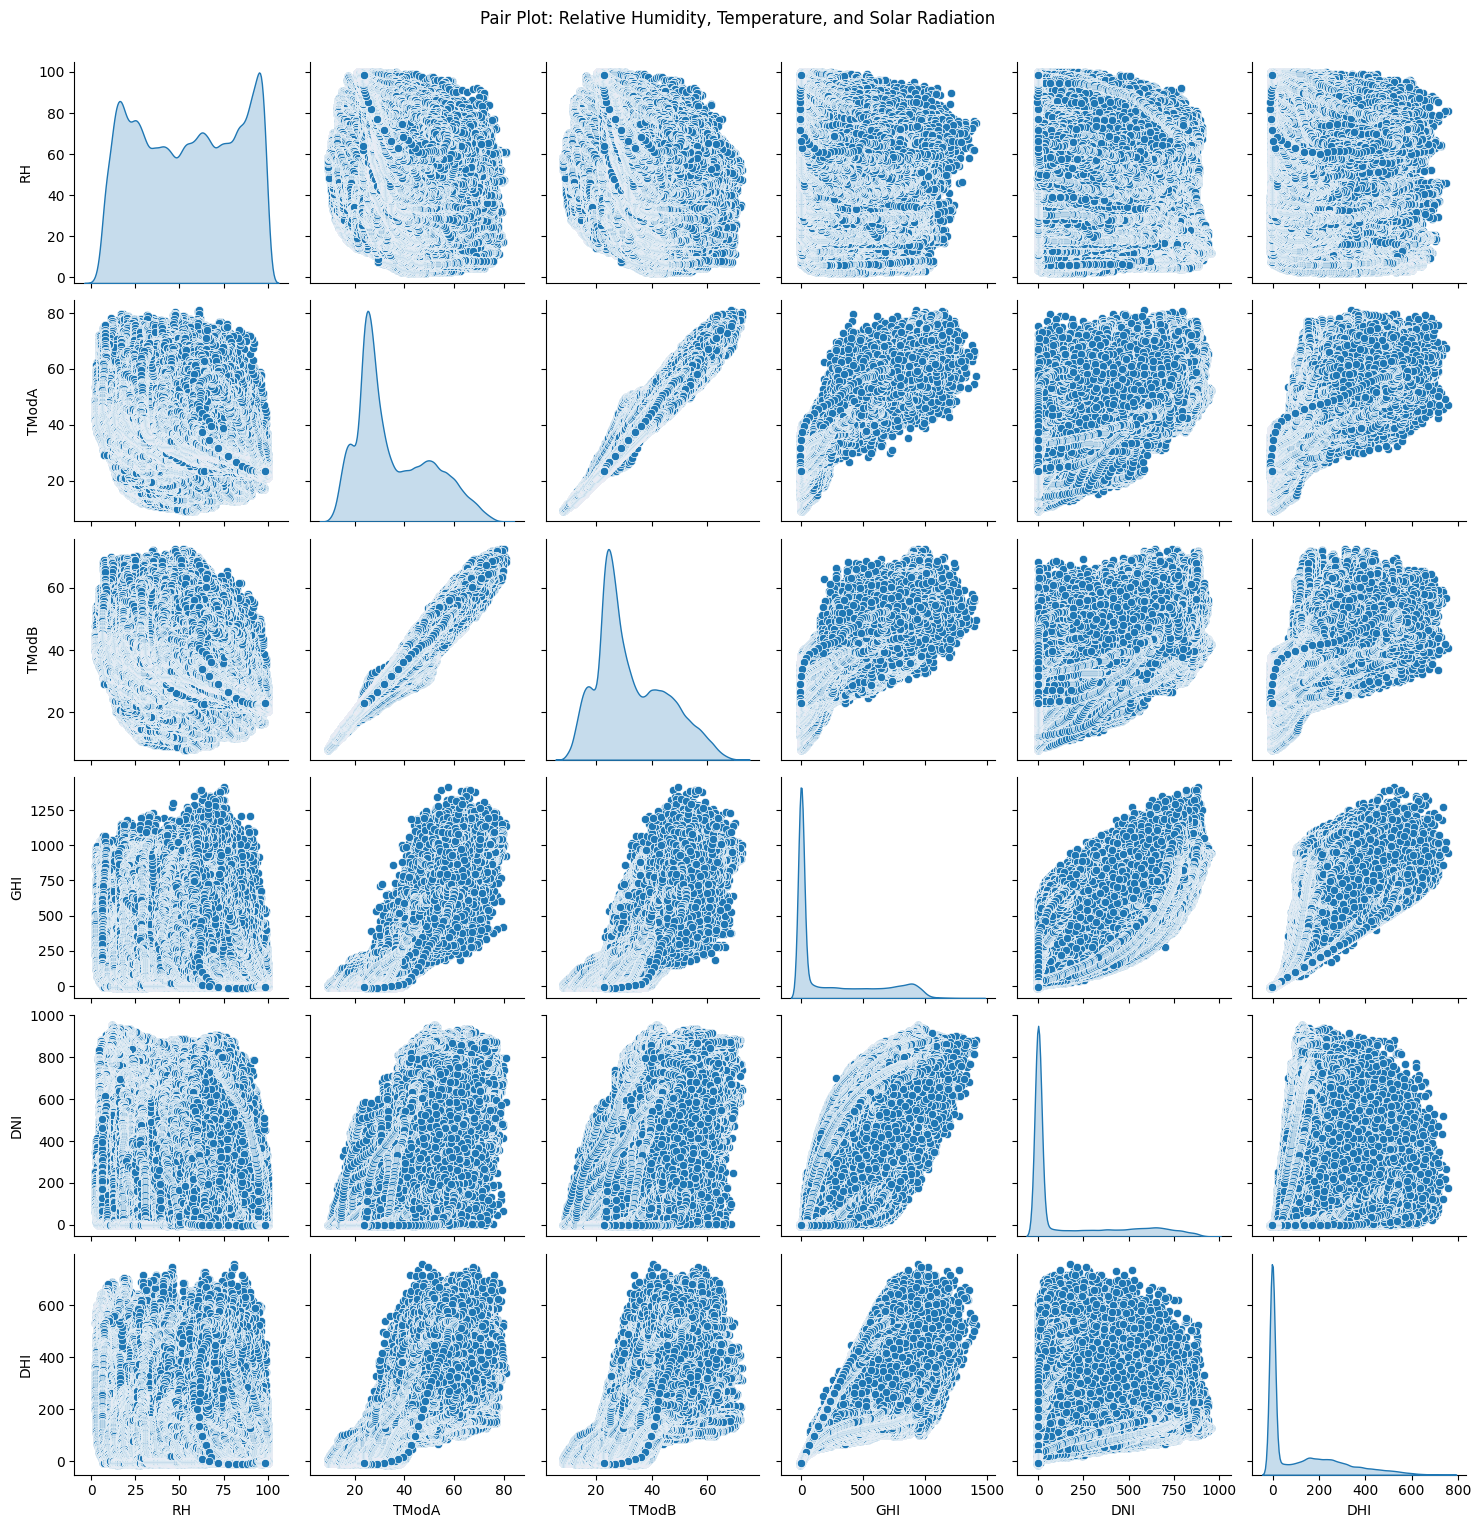

In [111]:
# Pair plot for RH, temperature readings, and solar radiation
sns.pairplot(data_t[['RH', 'TModA', 'TModB', 'GHI', 'DNI', 'DHI']], diag_kind='kde')
plt.suptitle("Pair Plot: Relative Humidity, Temperature, and Solar Radiation", y=1.02)
plt.show()


# Histograms

In [112]:

# Select columns of interest and drop missing values
variables_of_interest = ['GHI', 'DNI', 'DHI', 'WS', 'TModA', 'TModB']
data_h = data[variables_of_interest].dropna()


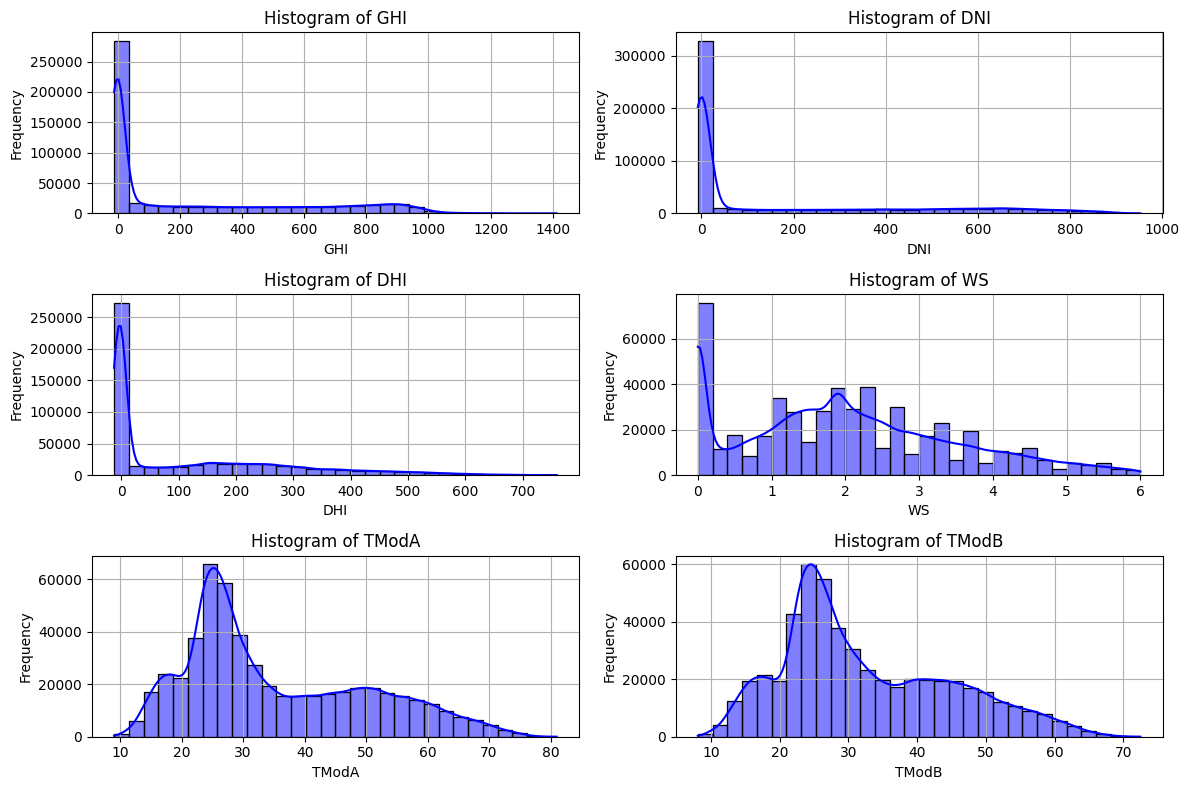

In [113]:
plt.figure(figsize=(12, 8))

# Plot histograms
for i, col in enumerate(variables_of_interest, 1):
    plt.subplot(3, 2, i)  # Create a subplot for each variable
    sns.histplot(data_h[col], kde=True, color='blue', bins=30, edgecolor="black")
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid()

plt.tight_layout()
plt.show()



# Z-score analysis

In [114]:
# Columns to analyze for Z-score analysis
columns_to_check = ['GHI', 'DNI', 'DHI', 'WS', 'TModA', 'TModB']

In [115]:
# Manually compute Z-scores
z_scores_df = pd.DataFrame()
for col in columns_to_check:
    mean = data[col].mean()
    std = data[col].std()
    z_scores_df[col] = (data[col] - mean) / std

# Flagging values with |Z-score| > 3
outliers = (z_scores_df.abs() > 3)


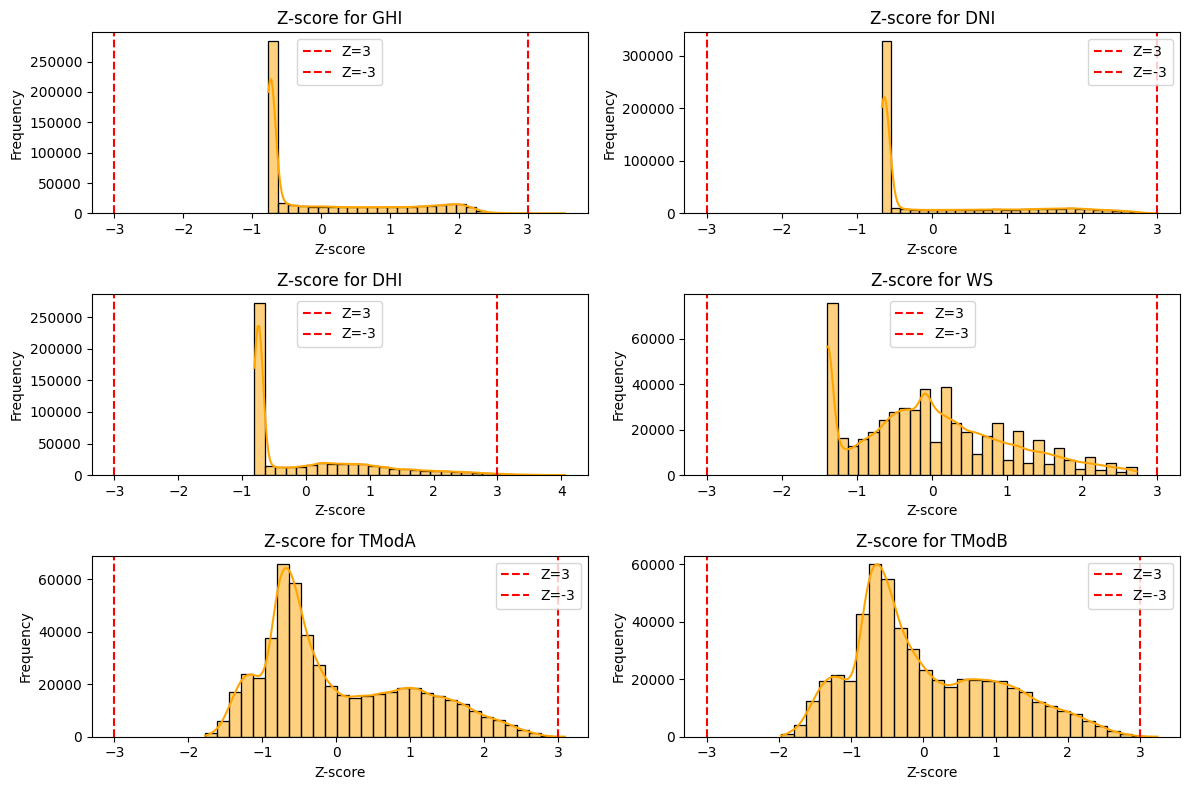

In [116]:
plt.figure(figsize=(12, 8))

for i, col in enumerate(columns_to_check, 1):
    plt.subplot(3, 2, i)
    sns.histplot(z_scores_df[col], kde=True, bins=30, color='orange')
    plt.axvline(x=3, color='red', linestyle='dashed', label='Z=3')
    plt.axvline(x=-3, color='red', linestyle='dashed', label='Z=-3')
    plt.title(f"Z-score for {col}")
    plt.xlabel("Z-score")
    plt.ylabel("Frequency")
    plt.legend()

plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

c:\ML and DS Files\Kifiya AI\Kaim-week-0\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


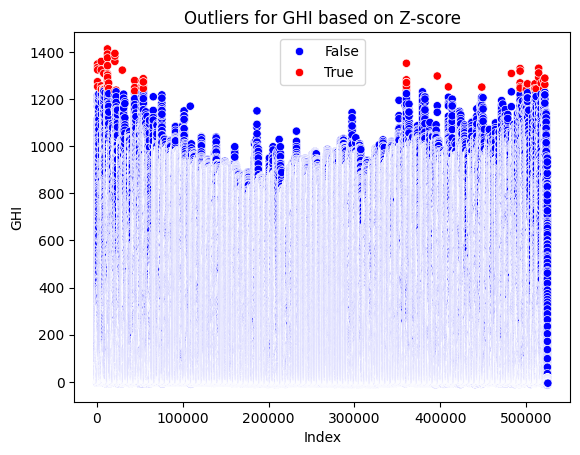

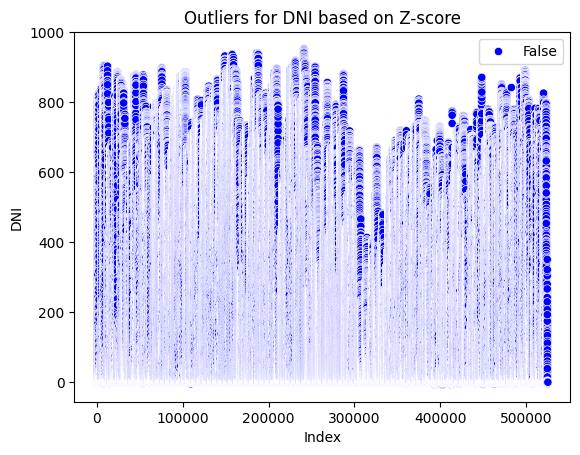

c:\ML and DS Files\Kifiya AI\Kaim-week-0\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


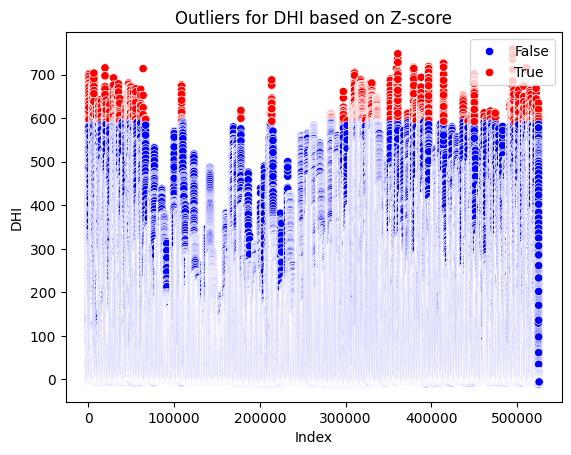

c:\ML and DS Files\Kifiya AI\Kaim-week-0\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


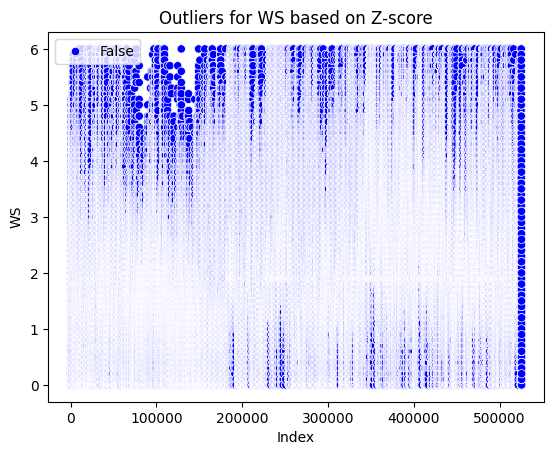

c:\ML and DS Files\Kifiya AI\Kaim-week-0\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


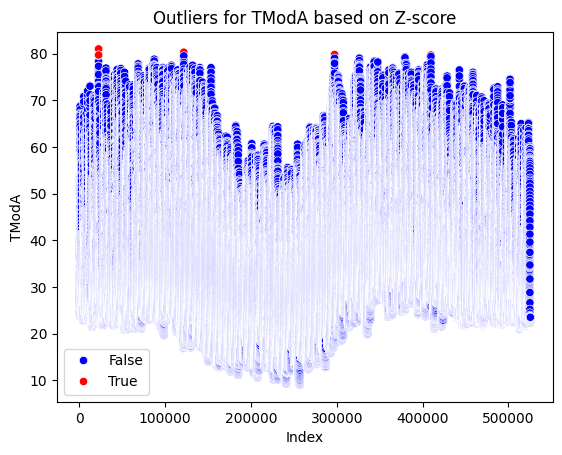

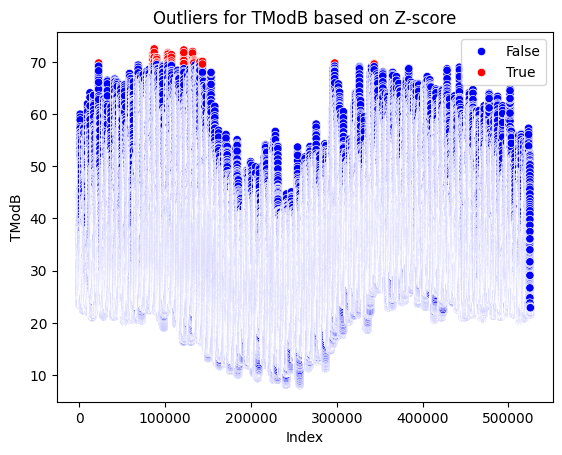

In [117]:
#Identify and Visualize Outliers
plt.figure(figsize=(10, 6))

for col in columns_to_check:
    plt.figure()
    sns.scatterplot(x=data.index, y=data[col], hue=outliers[col], palette={True: 'red', False: 'blue'})
    plt.title(f"Outliers for {col} based on Z-score")
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.legend()
    plt.show()


# Z score bubble


In [120]:
columns_of_interest = ['GHI', 'Tamb', 'WS', 'RH', 'BP']
data_b = data[columns_of_interest].dropna()  # Drop missing values

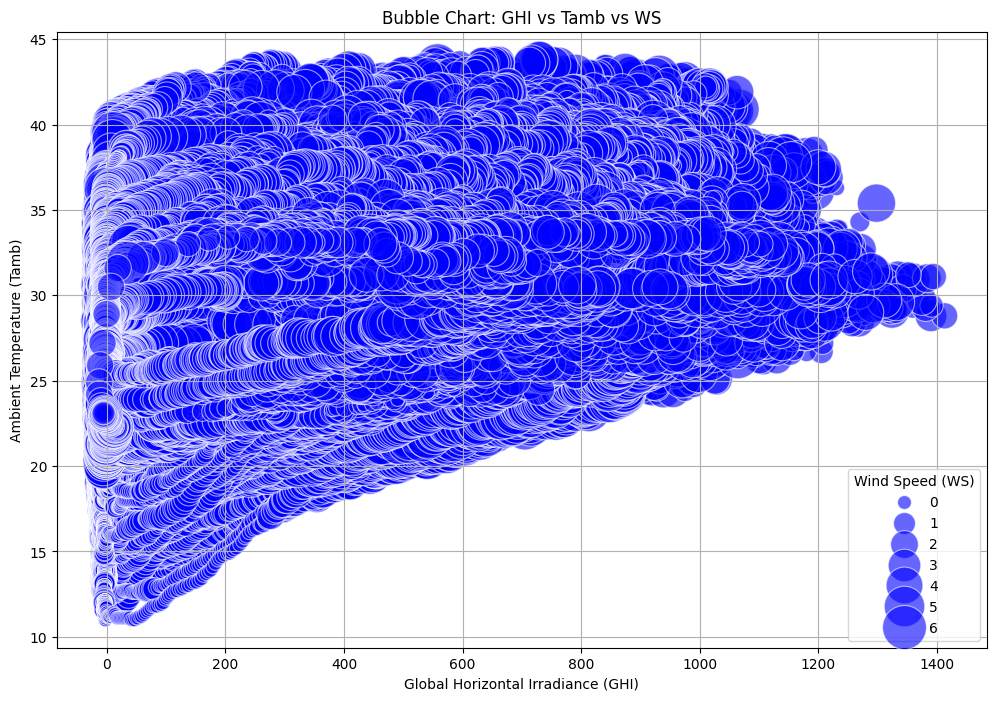

In [119]:
# GHI vs Tamb vs WS (bubble size)
# Create a bubble chart
plt.figure(figsize=(12, 8))

# Plot data
sns.scatterplot(
    x='GHI',
    y='Tamb',
    size='WS',
    sizes=(100, 1000),  # Adjust range of bubble sizes
    alpha=0.6,
    data=data_b,
    color='b',
)

# Add labels and title
plt.xlabel('Global Horizontal Irradiance (GHI)')
plt.ylabel('Ambient Temperature (Tamb)')
plt.title('Bubble Chart: GHI vs Tamb vs WS')
plt.legend(title="Wind Speed (WS)", loc='best')
plt.grid()
plt.show()
